# EQUITY DIGITAL ASSET-OR-NOTHING EUROPEAN OPTION

Valuation and Risk of Equity Digital Options that have their barrier observed at expiry only.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
#  FINANCEPY BETA Version 0.350 - This build: 30 Apr 2024 at 21:20 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



# Asset-or-Nothing Digital Option

I define a digital call and a digital put option.

In [3]:
underlying_type = FinDigitalOptionTypes.ASSET_OR_NOTHING

In [4]:
expiry_dt = Date(1, 1, 2008)

In [5]:
strike_price = 65.0

In [6]:
digitalCall = EquityDigitalOption(expiry_dt, strike_price, OptionTypes.EUROPEAN_CALL, underlying_type)

In [7]:
digitalPut = EquityDigitalOption(expiry_dt, strike_price, OptionTypes.EUROPEAN_PUT, underlying_type)

In [8]:
print(digitalCall)

OBJECT TYPE: EquityDigitalOption
EXPIRY DATE: 01-JAN-2008
BARRIER LEVEL: 65.0
CALL-PUT TYPE: OptionTypes.EUROPEAN_CALL
DIGITAL TYPE: FinDigitalOptionTypes.ASSET_OR_NOTHING


In [9]:
print(digitalPut)

OBJECT TYPE: EquityDigitalOption
EXPIRY DATE: 01-JAN-2008
BARRIER LEVEL: 65.0
CALL-PUT TYPE: OptionTypes.EUROPEAN_PUT
DIGITAL TYPE: FinDigitalOptionTypes.ASSET_OR_NOTHING


## Valuation

In [10]:
value_dt = Date(1, 7, 2007)

In [11]:
interest_rate = 0.07

In [12]:
discount_curve = DiscountCurveFlat(value_dt, interest_rate)

In [13]:
volatility = 0.27

In [14]:
model = BlackScholes(volatility)

In [15]:
stock_price = 70.0
dividend_yield = 0.05

In [16]:
dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)

In [17]:
digitalCall.value(value_dt, stock_price, discount_curve, dividend_curve, model)

48.03177217466735

In [18]:
digitalPut.value(value_dt, stock_price, discount_curve, dividend_curve, model)

20.2258946782528

## Check Monte-Carlo

In [19]:
digitalCall.value_mc(value_dt, stock_price, discount_curve, dividend_curve, model, 50000)

48.072486273604504

In [20]:
digitalPut.value_mc(value_dt, stock_price, discount_curve, dividend_curve, model, 50000)

20.186613355023177

## Vectorisations

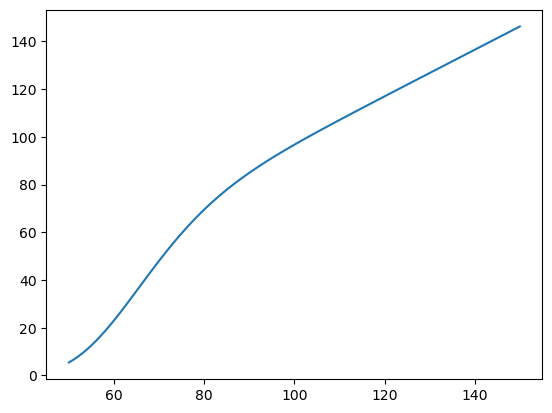

In [21]:
stock_prices = np.linspace(50,150,100)
v = digitalCall.value(value_dt, stock_prices, discount_curve, dividend_curve, model)
plt.plot(stock_prices, v);

And we can do the same to the option delta.

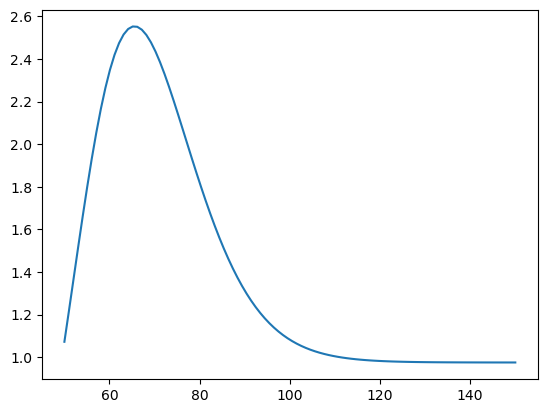

In [22]:
stock_prices = np.linspace(50,150,100)
v = digitalCall.delta(value_dt, stock_prices, discount_curve, dividend_curve, model)
plt.plot(stock_prices, v);

## Risk Analysis

The analytical model produced the following sensitivities

In [23]:
digitalCall.delta(value_dt, stock_price, discount_curve, dividend_curve, model)

2.4448160559842336

In [24]:
digitalCall.gamma(value_dt, stock_price, discount_curve, dividend_curve, model)

-0.044994408199272584

In [25]:
digitalCall.theta(value_dt, stock_price, discount_curve, dividend_curve, model)

8.007935522136407

In [26]:
digitalCall.vega(value_dt, stock_price, discount_curve, dividend_curve, model)

-0.2872979823385293

In [27]:
digitalCall.rho(value_dt, stock_price, discount_curve, dividend_curve, model)

62.05430152036229

Copyright (c) 2020 Dominic O'Kane